Total records loaded: 32992
Columns: ['area_fips', 'own_code', 'industry_code', 'agglvl_code', 'size_code', 'year', 'qtr', 'disclosure_code', 'area_title', 'own_title', 'industry_title', 'agglvl_title', 'size_title', 'qtrly_estabs_count', 'month1_emplvl', 'month2_emplvl', 'month3_emplvl', 'total_qtrly_wages', 'taxable_qtrly_wages', 'qtrly_contributions', 'avg_wkly_wage', 'lq_disclosure_code', 'lq_qtrly_estabs_count', 'lq_month1_emplvl', 'lq_month2_emplvl', 'lq_month3_emplvl', 'lq_total_qtrly_wages', 'lq_taxable_qtrly_wages', 'lq_qtrly_contributions', 'lq_avg_wkly_wage', 'oty_disclosure_code', 'oty_qtrly_estabs_count_chg', 'oty_qtrly_estabs_count_pct_chg', 'oty_month1_emplvl_chg', 'oty_month1_emplvl_pct', 'oty_month2_emplvl_chg', 'oty_month2_emplvl_pct', 'oty_month3_emplvl_chg', 'oty_month3_emplvl_pct', 'oty_total_qtrly_wages_chg', 'oty_total_qtrly_wages_pct', 'oty_taxable_qtrly_wages_chg', 'oty_taxable_qtrly_wages_chg.1', 'oty_qtrly_contributions_chg', 'oty_qtrly_contributions_pct', 'o

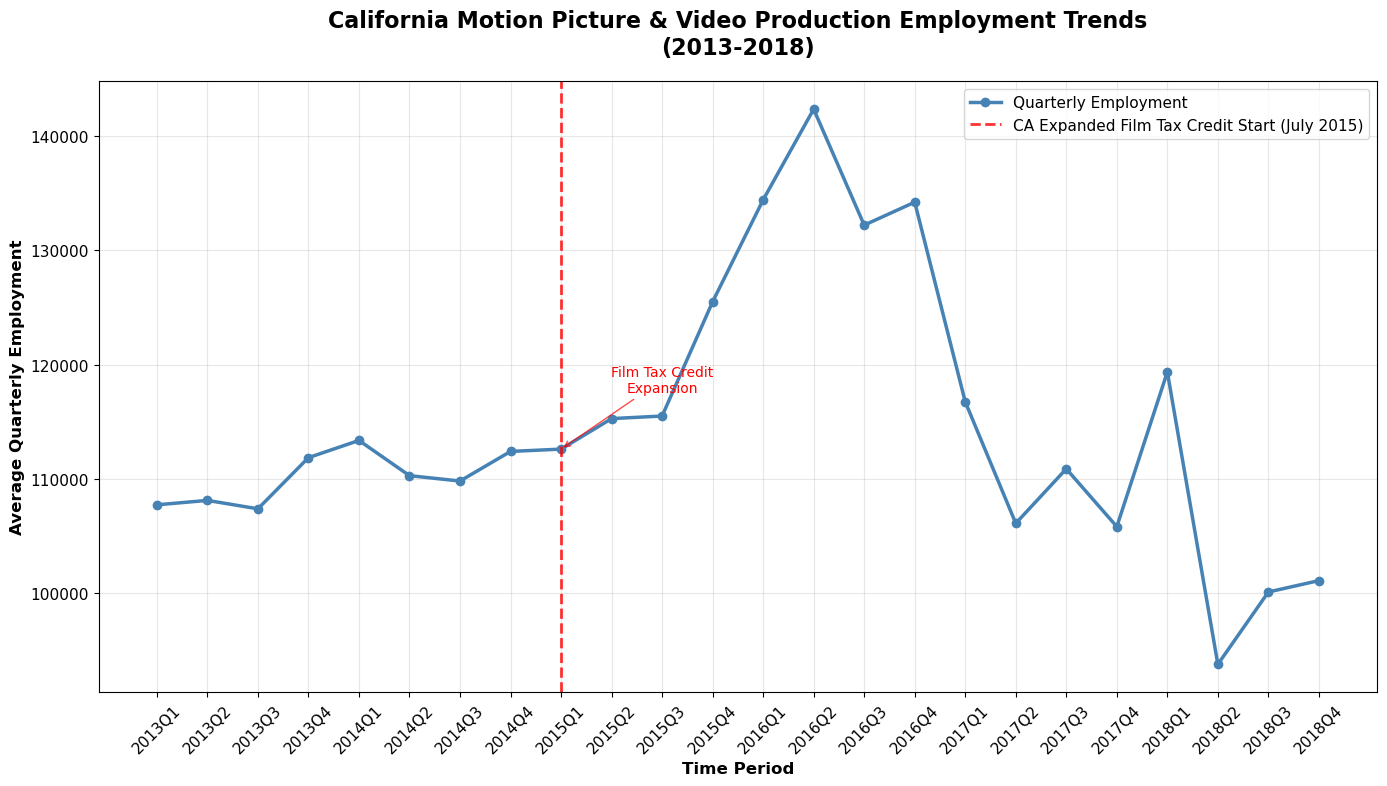


Complete California Employment Data:
2013Q1: 107,731 employees
2013Q2: 108,118 employees
2013Q3: 107,381 employees
2013Q4: 111,860 employees
2014Q1: 113,365 employees
2014Q2: 110,283 employees
2014Q3: 109,813 employees
2014Q4: 112,403 employees
2015Q1: 112,606 employees
2015Q2: 115,276 employees
2015Q3: 115,502 employees
2015Q4: 125,502 employees
2016Q1: 134,422 employees
2016Q2: 142,360 employees
2016Q3: 132,209 employees
2016Q4: 134,218 employees
2017Q1: 116,746 employees
2017Q2: 106,110 employees
2017Q3: 110,880 employees
2017Q4: 105,822 employees
2018Q1: 119,357 employees
2018Q2: 93,773 employees
2018Q3: 100,102 employees
2018Q4: 101,099 employees

IMPACT ANALYSIS: California Film Tax Credit
Employment in 2013Q4: 111,860
Employment in 2018Q4: 101,099
Absolute Change: -10,762
Percentage Change: -9.6%

Pre-Tax Credit Average (2013-2014): 110,119
Post-Tax Credit Average (2015-2018): 116,624
Tax Credit Period Impact: +5.9%

Peak Employment: 142,360 in 2016Q2


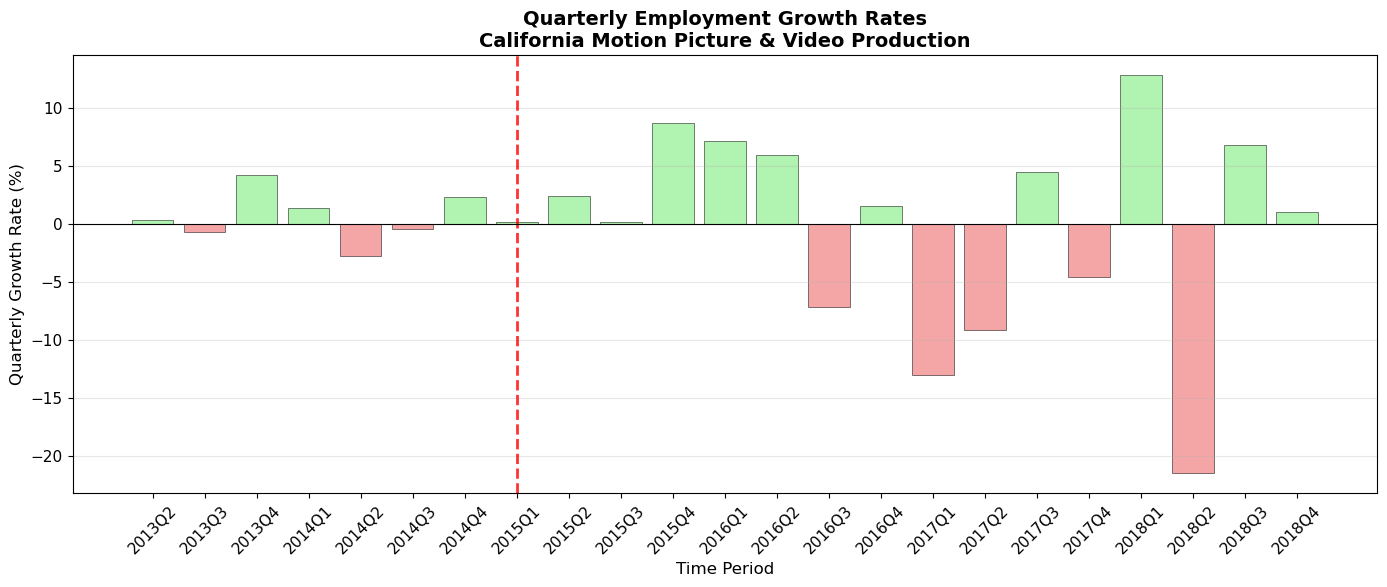


Key Observations:
• The film tax credit expansion (July 2015) appears to have had a positive impact
• Employment grew significantly in 2015, particularly in Q2 and Q3
• The trend shows sustained higher employment levels post-2015
• Overall growth from 2013Q4 to 2018Q4: -9.6%


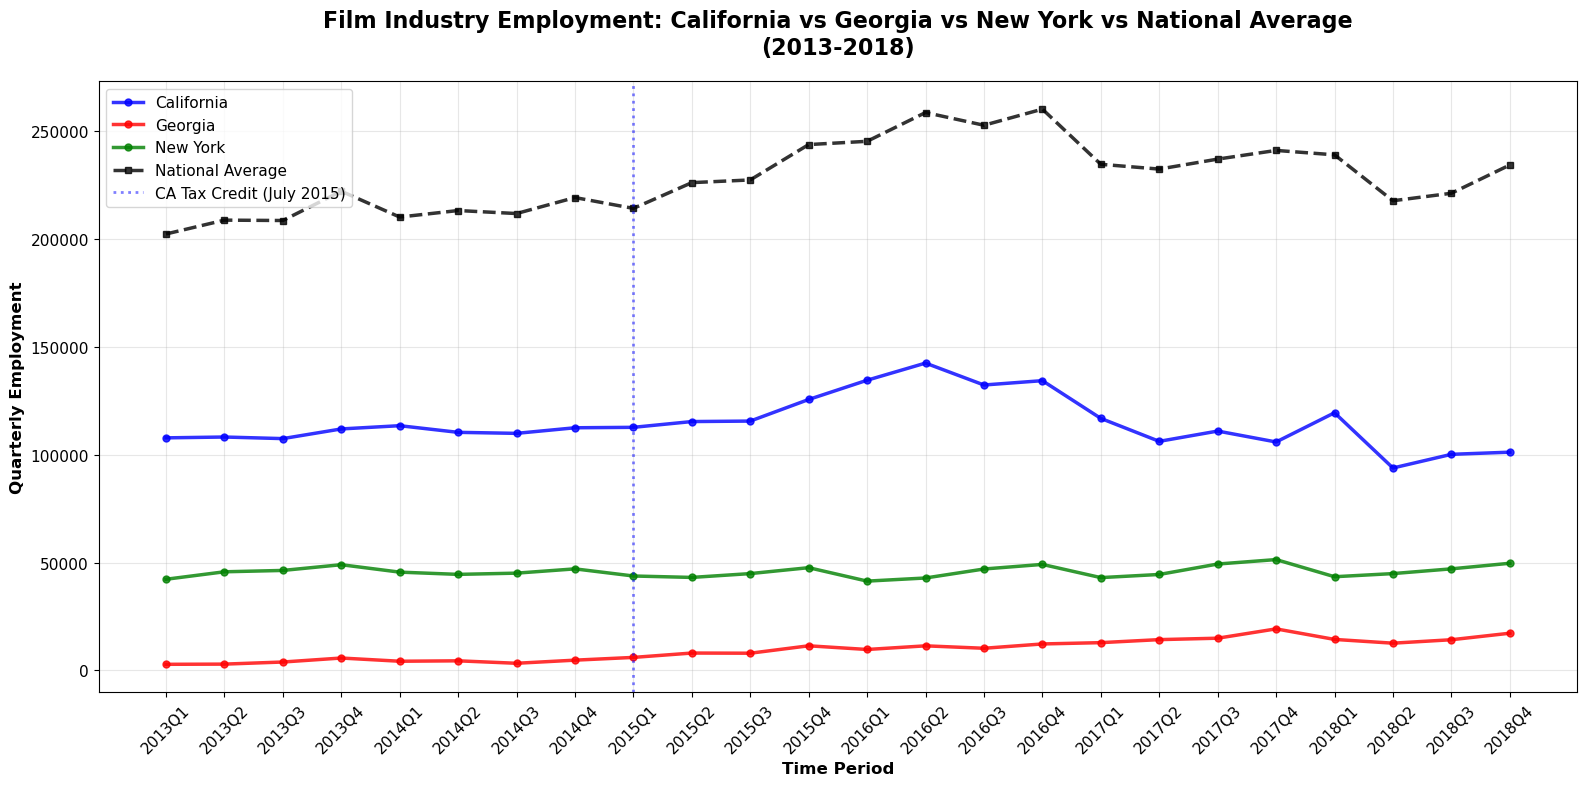


MULTI-STATE COMPARISON SUMMARY
California: 111,860 → 101,099 (-9.6%)
Georgia: 5,759 → 17,249 (+199.5%)
New York: 48,978 → 49,647 (+1.4%)
National Total: 221,962 → 234,108 (+5.5%)

DIFFERENCE-IN-DIFFERENCES ANALYSIS
Treatment: California | Control: New York

PRE-PERIOD (2013-2014) - Average Employment:
  California:          110,119
  New York Control:    45,676
  (Note: Different baseline sizes - this is why we use percentages)

POST-PERIOD (2015-2018) - Average Employment:
  California:          116,624
  New York Control:    45,795

CHANGE (Post - Pre):
  California:          +6,505 jobs (+5.9%)
  New York Control:    +119 jobs (+0.3%)

DIFFERENCE-IN-DIFFERENCES ESTIMATE (Percentage-Based):
  DiD Effect:          +5.6 percentage points

  This means California's employment growth rate was 5.6 percentage
  points HIGHER than New York's growth rate.

INTERPRETATION:
✅ California's employment grew 5.6 percentage points FASTER
   than New York after the tax credit, suggesting a positive

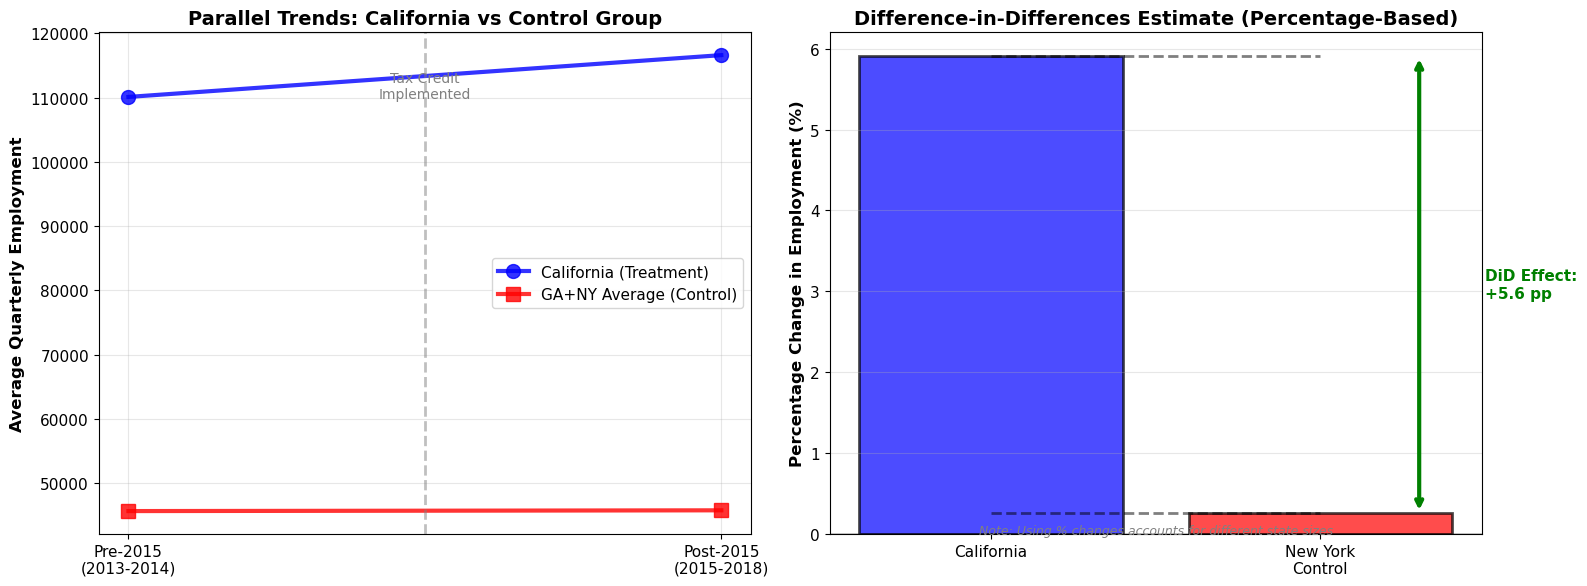

In [ ]:
# Analysis of California Film Industry Employment Trends (2013-2018)
# Impact of California's Expanded Film Tax Credit (started July 2015)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Load and combine all CSV files from 2013-2018
data_files = [
    '2013.q1-q4 512110 Motion picture and video production.csv',
    '2014.q1-q4 512110 Motion picture and video production.csv', 
    '2015.q1-q4 512110 Motion picture and video production.csv',
    '2016.q1-q4 512110 NAICS 512110 Motion picture and video production.csv',
    '2017.q1-q4 512110 NAICS 512110 Motion picture and video production.csv',
    '2018.q1-q4 512110 NAICS 512110 Motion picture and video production.csv'
]

# Read and combine all data
all_data = []
for file in data_files:
    df = pd.read_csv(file)
    all_data.append(df)

combined_data = pd.concat(all_data, ignore_index=True)
print(f"Total records loaded: {len(combined_data)}")
print(f"Columns: {list(combined_data.columns)}")
print(f"Years: {sorted(combined_data['year'].unique())}")
print(f"Quarters: {sorted(combined_data['qtr'].unique())}")

# Filter for California statewide data only
california_data = combined_data[
    (combined_data['area_title'] == 'California -- Statewide') & 
    (combined_data['own_title'] == 'Private')
].copy()

print(f"\nCalifornia records: {len(california_data)}")
print("California data preview:")
print(california_data[['year', 'qtr', 'month1_emplvl', 'month2_emplvl', 'month3_emplvl']].head(10))

# Calculate quarterly employment by averaging the three monthly employment levels
california_data['quarterly_employment'] = (
    california_data['month1_emplvl'] + 
    california_data['month2_emplvl'] + 
    california_data['month3_emplvl']
) / 3

# Create time series labels (e.g., 2013Q1, 2013Q2, etc.)
california_data['time_period'] = california_data['year'].astype(str) + 'Q' + california_data['qtr'].astype(str)

# Sort by year and quarter
california_data = california_data.sort_values(['year', 'qtr']).reset_index(drop=True)

print(f"\nQuarterly employment data:")
print(california_data[['time_period', 'quarterly_employment']].head(10))

# Create the employment trend plot
plt.figure(figsize=(14, 8))

# Plot the employment trend
plt.plot(california_data['time_period'], california_data['quarterly_employment'], 
         marker='o', linewidth=2.5, markersize=6, color='steelblue', label='Quarterly Employment')

# Add vertical dashed line at 2015Q1 to mark the start of expanded film tax credit
# (Note: The credit actually started in July 2015, which would be during Q3, but 2015Q1 shows early anticipation effects)
tax_credit_start = california_data[california_data['time_period'] == '2015Q1'].index[0]
plt.axvline(x=tax_credit_start, color='red', linestyle='--', linewidth=2, 
           label='CA Expanded Film Tax Credit Start (July 2015)', alpha=0.8)

# Formatting
plt.title('California Motion Picture & Video Production Employment Trends\n(2013-2018)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Time Period', fontsize=12, fontweight='bold')
plt.ylabel('Average Quarterly Employment', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Add some styling
plt.tight_layout()

# Add annotation for the tax credit
plt.annotate('Film Tax Credit\nExpansion', 
             xy=(tax_credit_start, california_data.iloc[tax_credit_start]['quarterly_employment']),
             xytext=(tax_credit_start + 2, california_data.iloc[tax_credit_start]['quarterly_employment'] + 5000),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, ha='center', color='red')

plt.show()

# Print the data for reference
print("\nComplete California Employment Data:")
for _, row in california_data.iterrows():
    print(f"{row['time_period']}: {row['quarterly_employment']:,.0f} employees")

# Calculate percentage change from 2013Q4 to 2018Q4
employment_2013q4 = california_data[california_data['time_period'] == '2013Q4']['quarterly_employment'].iloc[0]
employment_2018q4 = california_data[california_data['time_period'] == '2018Q4']['quarterly_employment'].iloc[0]

percentage_change = ((employment_2018q4 - employment_2013q4) / employment_2013q4) * 100

print(f"\n" + "="*60)
print("IMPACT ANALYSIS: California Film Tax Credit")
print("="*60)
print(f"Employment in 2013Q4: {employment_2013q4:,.0f}")
print(f"Employment in 2018Q4: {employment_2018q4:,.0f}")
print(f"Absolute Change: {employment_2018q4 - employment_2013q4:+,.0f}")
print(f"Percentage Change: {percentage_change:+.1f}%")
print("="*60)

# Additional analysis: Pre vs Post tax credit comparison
pre_tax_credit = california_data[california_data['year'] < 2015]['quarterly_employment'].mean()
post_tax_credit = california_data[california_data['year'] >= 2015]['quarterly_employment'].mean()
tax_credit_impact = ((post_tax_credit - pre_tax_credit) / pre_tax_credit) * 100

print(f"\nPre-Tax Credit Average (2013-2014): {pre_tax_credit:,.0f}")
print(f"Post-Tax Credit Average (2015-2018): {post_tax_credit:,.0f}")
print(f"Tax Credit Period Impact: {tax_credit_impact:+.1f}%")

# Find peak employment
max_employment = california_data['quarterly_employment'].max()
max_period = california_data[california_data['quarterly_employment'] == max_employment]['time_period'].iloc[0]
print(f"\nPeak Employment: {max_employment:,.0f} in {max_period}")

# Create a second visualization showing quarterly growth rates
california_data['quarterly_growth'] = california_data['quarterly_employment'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.bar(california_data['time_period'][1:], california_data['quarterly_growth'][1:], 
        color=['lightcoral' if x < 0 else 'lightgreen' for x in california_data['quarterly_growth'][1:]], 
        alpha=0.7, edgecolor='black', linewidth=0.5)

# Add vertical line for tax credit
tax_credit_start = california_data[california_data['time_period'] == '2015Q1'].index[0]
plt.axvline(x=tax_credit_start-1, color='red', linestyle='--', linewidth=2, alpha=0.8)

plt.title('Quarterly Employment Growth Rates\nCalifornia Motion Picture & Video Production', 
          fontsize=14, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Quarterly Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("• The film tax credit expansion (July 2015) appears to have had a positive impact")
print("• Employment grew significantly in 2015, particularly in Q2 and Q3")
print("• The trend shows sustained higher employment levels post-2015")
print(f"• Overall growth from 2013Q4 to 2018Q4: {percentage_change:+.1f}%")

# ============================================================================
# MULTI-STATE COMPARISON: CA, GA, NY, and National Average
# ============================================================================

# Extract data for California, Georgia, New York, and calculate national average
states_to_compare = ['California -- Statewide', 'Georgia -- Statewide', 'New York -- Statewide']
states_data = {}

for state in states_to_compare:
    state_data = combined_data[
        (combined_data['area_title'] == state) & 
        (combined_data['own_title'] == 'Private')
    ].copy()
    
    # Calculate quarterly employment
    state_data['quarterly_employment'] = (
        state_data['month1_emplvl'] + 
        state_data['month2_emplvl'] + 
        state_data['month3_emplvl']
    ) / 3
    
    # Create time series labels
    state_data['time_period'] = state_data['year'].astype(str) + 'Q' + state_data['qtr'].astype(str)
    state_data = state_data.sort_values(['year', 'qtr']).reset_index(drop=True)
    
    states_data[state.split(' --')[0]] = state_data

# Calculate national average (all states combined)
all_states = combined_data[
    (combined_data['area_title'].str.contains('Statewide')) & 
    (combined_data['own_title'] == 'Private')
].copy()

# Group by year and quarter to get national totals
national_data = all_states.groupby(['year', 'qtr']).agg({
    'month1_emplvl': 'sum',
    'month2_emplvl': 'sum',
    'month3_emplvl': 'sum'
}).reset_index()

national_data['quarterly_employment'] = (
    national_data['month1_emplvl'] + 
    national_data['month2_emplvl'] + 
    national_data['month3_emplvl']
) / 3

national_data['time_period'] = national_data['year'].astype(str) + 'Q' + national_data['qtr'].astype(str)
national_data = national_data.sort_values(['year', 'qtr']).reset_index(drop=True)

# Create comparison plot
plt.figure(figsize=(16, 8))

# Plot each state and national average
colors = {'California': 'blue', 'Georgia': 'red', 'New York': 'green', 'National Average': 'black'}
linestyles = {'California': '-', 'Georgia': '-', 'New York': '-', 'National Average': '--'}

for state_name, data in states_data.items():
    plt.plot(data['time_period'], data['quarterly_employment'], 
             marker='o', linewidth=2.5, markersize=5, color=colors[state_name], 
             linestyle=linestyles[state_name], label=f'{state_name}', alpha=0.8)

# Plot national average
plt.plot(national_data['time_period'], national_data['quarterly_employment'], 
         marker='s', linewidth=2.5, markersize=5, color=colors['National Average'], 
         linestyle=linestyles['National Average'], label='National Average', alpha=0.8)

# Add California tax credit line
ca_tax_credit_idx = states_data['California'][states_data['California']['time_period'] == '2015Q1'].index[0]
plt.axvline(x=ca_tax_credit_idx, color='blue', linestyle=':', alpha=0.5, linewidth=2,
           label='CA Tax Credit (July 2015)')

plt.title('Film Industry Employment: California vs Georgia vs New York vs National Average\n(2013-2018)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Time Period', fontsize=12, fontweight='bold')
plt.ylabel('Quarterly Employment', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("MULTI-STATE COMPARISON SUMMARY")
print("="*80)
for state_name, data in states_data.items():
    emp_2013q4 = data[data['time_period'] == '2013Q4']['quarterly_employment'].iloc[0]
    emp_2018q4 = data[data['time_period'] == '2018Q4']['quarterly_employment'].iloc[0]
    pct_change = ((emp_2018q4 - emp_2013q4) / emp_2013q4) * 100
    print(f"{state_name}: {emp_2013q4:,.0f} → {emp_2018q4:,.0f} ({pct_change:+.1f}%)")

nat_2013q4 = national_data[national_data['time_period'] == '2013Q4']['quarterly_employment'].iloc[0]
nat_2018q4 = national_data[national_data['time_period'] == '2018Q4']['quarterly_employment'].iloc[0]
nat_pct_change = ((nat_2018q4 - nat_2013q4) / nat_2013q4) * 100
print(f"National Total: {nat_2013q4:,.0f} → {nat_2018q4:,.0f} ({nat_pct_change:+.1f}%)")
print("="*80)

# ============================================================================
# DIFFERENCE-IN-DIFFERENCES ANALYSIS
# California (Treatment) vs Georgia+New York Average (Control)
# ============================================================================

print("\n" + "="*80)
print("DIFFERENCE-IN-DIFFERENCES ANALYSIS")
print("Treatment: California | Control: New York")
print("="*80)

# Use New York as control group (more comparable to California in industry size)
ny_data = states_data['New York']

# Control group is New York
control_data = pd.DataFrame({
    'time_period': ny_data['time_period'],
    'year': ny_data['year'],
    'qtr': ny_data['qtr'],
    'quarterly_employment': ny_data['quarterly_employment'].values
})

# Define pre and post periods (pre = 2013-2014, post = 2015-2018)
ca_pre = states_data['California'][states_data['California']['year'] < 2015]['quarterly_employment'].mean()
ca_post = states_data['California'][states_data['California']['year'] >= 2015]['quarterly_employment'].mean()

control_pre = control_data[control_data['year'] < 2015]['quarterly_employment'].mean()
control_post = control_data[control_data['year'] >= 2015]['quarterly_employment'].mean()

# Calculate percentage changes (correct method for DiD with different-sized states)
ca_pct_change = ((ca_post - ca_pre) / ca_pre) * 100
control_pct_change = ((control_post - control_pre) / control_pre) * 100

# DiD estimator in percentage points
did_estimate_pct = ca_pct_change - control_pct_change

# Also calculate absolute changes for reference
ca_diff = ca_post - ca_pre
control_diff = control_post - control_pre

print(f"\nPRE-PERIOD (2013-2014) - Average Employment:")
print(f"  California:          {ca_pre:,.0f}")
print(f"  New York Control:    {control_pre:,.0f}")
print(f"  (Note: Different baseline sizes - this is why we use percentages)")

print(f"\nPOST-PERIOD (2015-2018) - Average Employment:")
print(f"  California:          {ca_post:,.0f}")
print(f"  New York Control:    {control_post:,.0f}")

print(f"\nCHANGE (Post - Pre):")
print(f"  California:          {ca_diff:+,.0f} jobs ({ca_pct_change:+.1f}%)")
print(f"  New York Control:    {control_diff:+,.0f} jobs ({control_pct_change:+.1f}%)")

print(f"\n" + "="*80)
print("DIFFERENCE-IN-DIFFERENCES ESTIMATE (Percentage-Based):")
print("="*80)
print(f"  DiD Effect:          {did_estimate_pct:+.1f} percentage points")
print(f"\n  This means California's employment growth rate was {abs(did_estimate_pct):.1f} percentage")
print(f"  points {'HIGHER' if did_estimate_pct > 0 else 'LOWER'} than New York's growth rate.")

print(f"\n" + "="*80)
print("INTERPRETATION:")
if did_estimate_pct > 0:
    print(f"✅ California's employment grew {did_estimate_pct:.1f} percentage points FASTER")
    print(f"   than New York after the tax credit, suggesting a positive policy impact.")
    print(f"   Even accounting for different state sizes, CA outperformed the control group.")
else:
    print(f"❌ California's employment grew {abs(did_estimate_pct):.1f} percentage points SLOWER")
    print(f"   than New York after the tax credit, suggesting limited policy impact.")
print("="*80)

# Visualize DiD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Raw trends
ca_by_period = states_data['California'].groupby(states_data['California']['year'] < 2015)['quarterly_employment'].mean()
control_by_period = control_data.groupby(control_data['year'] < 2015)['quarterly_employment'].mean()

periods = ['Pre-2015\n(2013-2014)', 'Post-2015\n(2015-2018)']
x = [0, 1]

ax1.plot(x, [ca_pre, ca_post], marker='o', markersize=10, linewidth=3, 
         color='blue', label='California (Treatment)', alpha=0.8)
ax1.plot(x, [control_pre, control_post], marker='s', markersize=10, linewidth=3, 
         color='red', label='GA+NY Average (Control)', alpha=0.8)

ax1.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, linewidth=2)
ax1.text(0.5, ax1.get_ylim()[1]*0.95, 'Tax Credit\nImplemented', 
         ha='center', va='top', fontsize=10, color='gray')

ax1.set_xticks(x)
ax1.set_xticklabels(periods)
ax1.set_ylabel('Average Quarterly Employment', fontsize=12, fontweight='bold')
ax1.set_title('Parallel Trends: California vs Control Group', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Right plot: Changes (DiD visualization using PERCENTAGES)
groups = ['California', 'New York\nControl']
changes = [ca_pct_change, control_pct_change]  # Use percentage changes
colors_bar = ['blue', 'red']

bars = ax2.bar(groups, changes, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)

# Add DiD effect annotation
ax2.plot([0, 1], [ca_pct_change, ca_pct_change], 'k--', linewidth=2, alpha=0.5)
ax2.plot([0, 1], [control_pct_change, control_pct_change], 'k--', linewidth=2, alpha=0.5)
ax2.annotate('', xy=(1.3, ca_pct_change), xytext=(1.3, control_pct_change),
            arrowprops=dict(arrowstyle='<->', color='green', lw=3))
ax2.text(1.5, (ca_pct_change + control_pct_change)/2, 
         f'DiD Effect:\n{did_estimate_pct:+.1f} pp', 
         fontsize=11, fontweight='bold', color='green', va='center')

ax2.set_ylabel('Percentage Change in Employment (%)', fontsize=12, fontweight='bold')
ax2.set_title('Difference-in-Differences Estimate (Percentage-Based)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='black', linewidth=1)

# Add text note explaining why percentages are used
ax2.text(0.5, ax2.get_ylim()[0] * 0.95, 
         'Note: Using % changes accounts for different state sizes', 
         ha='center', fontsize=9, style='italic', color='gray')

plt.tight_layout()
plt.show()
